<a href="https://colab.research.google.com/github/bsttiv/Tarea-2/blob/main/Tarea2_Desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 2: Análisis Estadístico Simple**
En esta tarea continuaremos practicando con *Numpy, Pandas y Matplotlib* mientras también aprenderán a realizar análisis estadísticos básicos con estas librerías.

A estas alturas ya deben tener una noción de estadística y su aplicación en astronomía. La tarea consiste en hacer estimaciones sencillas a partir de datos astronómicos, usando herramientas básicas de Python que permiten trabajar con la estadística de distribuciones de datos.

La tarea está dividida en dos partes. La primera consiste en realizar una estimación del movimiento propio de un cúmulo globular ubicado en el halo de nuestra Galaxia a partir de la distribución de estos datos. La segunda parte consiste en comprobar cómo cambia la Señal a Ruido (S/N) al promediar varios espectros de un objeto. No es necesario que tengan conocimientos previos de astronomía por ahora, basta con que sepan manipular los datos indicados.

Esta tarea involucra la creación de varias figuras. Así que **póngase creativo con las figuras :D, sus colores, formas, leyendas, etc. También asegúrese de siempre colocar un título y nombre a los ejes!**

In [99]:
# Antes de comenzar con la tarea debe correr esta celda para importar las librerías principales a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Primera parte: Estimar movimiento propio del cúmulo globular NGC 5694


En esta primera parte trataremos de estimar una cantidad en astronomía que se llama "movimiento propio" para un cúmulo globular llamado [NGC 5694](https://en.wikipedia.org/wiki/NGC_5694). Éste cúmulo globular se encuentra en el halo de nuestra Vía Láctea.

El movimiento propio de una estrella es el desplazamiento que esta tiene en el cielo, visto desde la Tierra, con el paso del tiempo. Aunque las estrellas parecen fijas a simple vista, en realidad se están moviendo a través del espacio. El movimiento propio mide este cambio en la posición de la estrella, no hacia nosotros ni alejándose, sino moviéndose de forma lateral en el cielo. Las unidades de medida de esta cantidad son mas/yr (miliarcseconds per year), una cantidad muuuuuuy pequeña.

Para que dimensione lo pequeña que es esta cantidad, calcule cuántos años le tomaría a una estrella, que se desplaza exclusivamente en dirección horizontal en el cielo con un movimiento propio de 1mas/yr, cubrir una distancia de 0.5 grados en el cielo en la misma dirección (equivalente al tamaño aparente de la Luna en el cielo).

Hint: 1 grado corresponde a $3.6$ x $10^6$ mas.

In [100]:
# Haga el cálculo aquí

# Grado en notación cientifica
grado = 3.6E+06

# Transformación a miliarcosegundos
grado_a_mas = grado/2

# Despejando de la ecuación años = miliarcosegundos * 1/movimiento propio
cantidad_de_años = 1*grado_a_mas
cantidad_de_años

1800000.0

### a) Cargar los Datos

Primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importe el archivo **ngc5694_pm.csv** utilizando la función **pd.read_csv(path)** y guárdelo como **data**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "ngc5694_pm.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [102]:
# Se guarda la ruta del archivo en mi Drive y se lee
path_archivo = 'drive/MyDrive/Modulo/Tarea2/ngc5694_pm.csv'
data = pd.read_csv(path_archivo)

### b) Explorar el DataFrame
Explore las columnas del archivo y muestre el DataFrame

In [103]:
# Muestra las columnas aquí

# Se muestran las columnas
data.columns

Index(['Unnamed: 0', 'ra', 'dec', 'pmra', 'pmdec'], dtype='object')

In [104]:
# Muestra el DataFrame aquí
data

,Unnamed: 0,ra,dec,pmra,pmdec
0,0,219.370629,-27.312548,0.053134,-1.674613
1,1,219.373996,-27.243801,-0.960711,-0.283708
2,2,219.363458,-27.213113,0.674957,-1.741153
3,3,219.336931,-27.172985,-0.057975,-0.564131
4,4,219.463706,-27.189408,-0.438914,-0.487856
...,...,...,...,...,...
616,616,220.732855,-26.148055,-0.269935,-0.891652
617,617,220.710525,-26.150902,-0.962554,-0.400258
618,618,219.327652,-27.267281,-0.796753,-0.266571
619,619,219.225796,-27.172318,-0.901963,-0.302597


### c) Graficar un scatter plot
Cada fila del DataFrame corresponde a una estrella del cielo y, como habra notado, hay dos columnas denominadas **pmra** y **pmdec**. Estas representan el movimiento propio en ascensión recta y el movimiento propio en declinación, respectivamente, que son los desplazamientos de una estrella en dos ejes distintos del cielo: RA y DEC.

Selecciona del DataFrame los datos de las columnas **pmra** y **pmdec** y guárdalos en las variables indicadas. Luego, realiza un gráfico de dispersión (scatter plot) colocando en el eje x los datos de "pmra" y en el eje y los de "pmdec".

In [105]:
# Se extraen las columnas pmra y pmdec a través de los índices
pmra = data["pmra"]
pmdec = data["pmdec"]

Text(0.5, 1.0, 'Desplazamientos de una estrella en los ejes RA y DEC')

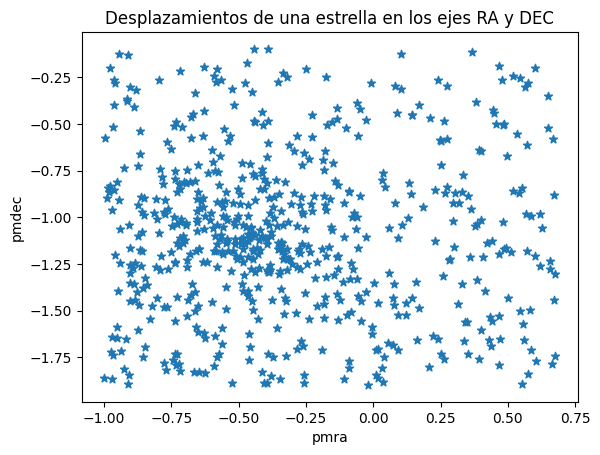

In [106]:
# Haga el gráfico en esta celda

# Usando plt.scatter se crea el gráfico de dispersion y se añaden los titulos correspondientes.
plt.scatter(pmra, pmdec, marker='*')
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.title("Desplazamientos de una estrella en los ejes RA y DEC")

Si observa bien, parece que los puntos se concentran hacia la parte izquierda del gráfico. Ese grupo representa los movimientos propios de las estrellas que pertencen al cúmulo globular. Los demás puntos corresponden a los movimientos propios de estrellas de la galaxia que se "colaron" en la línea de visión entre nosotros (Tierra) y el cúmulo.

### c) Generar distribución Gaussiana
Calcule el promedio y la desviación estándar de ambas columnas (**pmra** y **pmdec**) y guárdelos en las variables que se indican.

In [107]:
# Se obtienen las desviaciones estándar y promedios de pmra y pmdec a través de los métodos mean y std

mu_pmra = pmra.mean()
std_pmra = pmra.std()

mu_pmdec = pmdec.mean()
std_pmdec = pmdec.std()


Con los promedios y desviaciones estandar obtenidas, simule una distribución gaussiana para cada eje del movimieto propio (pmra y pmdec). Recuerda que la distribución gaussiana es de la forma:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$


Por lo que necesitamos los valores de $x, \mu$ y $\sigma$ para cada caso.

**En ascención recta**:
1. Crea un arreglo de 300 números que estén entre -1.5 y 1. Este sería el $x$
2. Con $\mu$ y $\sigma$ correspondientes a pmra calculados en la celda de arriba, genere los valores $f(x)$. Para eso, utilize la función **norm** de **scipy.stats** que está importada en la siguiente celda. Usa el método **pdf** (probability density function)



**En declinación:**
Haga lo mismo, pero el $x$ sería 300 números que estén entre -2.5 y 0.5.

In [108]:
from scipy.stats import norm

# Arreglo con 300 números entre -1.5 y 1
x_pmra = np.linspace(-1.5, 1, 300)
# Se le aplica la función de la distribución gaussiana a este array, en conjunto con el promedio y desviación estándar del pmra
fx_pmra = norm.pdf(x_pmra, mu_pmra, std_pmra)

# Arreglo con 300 numeros entre -2.5 y 0.5
x_pmdec = np.linspace(-2.5, 0.5, 300)
# Similarmente, se le aplica la función de la distribución gaussiana a este array, en conjunto con el promedio y desviación estándar del pmdec
fx_pmdec = norm.pdf(x_pmdec, mu_pmdec, std_pmdec)

### d) Graficar histogramas de la distribución de movimientos propios junto a la distribución Gaussiana

Grafique con matplotlib un hitograma (busque qué método de matplotlib sirve) de pmra y sobre él grafique la gaussiana correspondiente.

Text(0.5, 1.0, 'Distribución de movimientos propios en RA junto a su gaussiana')

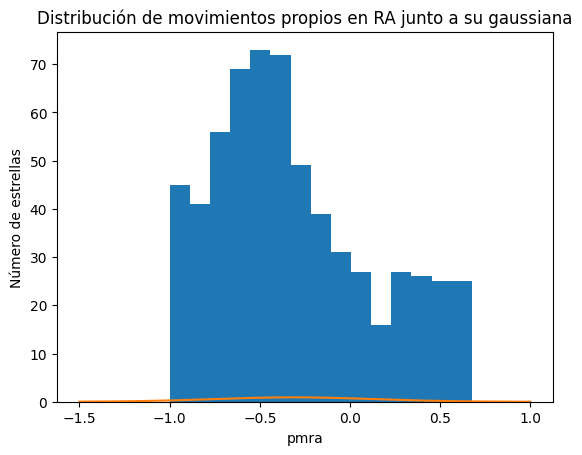

In [109]:
# Se crea el objeto de gráfico
_, axs = plt.subplots(1, 1)

# Se grafican las dos figuras juntas: un histograma de pmra con 15 bins y la distribución gaussiana.
axs.hist(pmra, 15)
axs.plot(x_pmra, fx_pmra)

# Se añaden los títulos
axs.set_xlabel("pmra")
axs.set_ylabel("Número de estrellas")
axs.set_title("Distribución de movimientos propios en RA junto a su gaussiana")

Notará que la gaussiana apenas se ve en el gráfico, esto es porque la gaussiana está normalizada (el área bajo la curva es 1), pero esto no es así para el histograma. El problema se puede arreglar incluyendo el parámetro **density=True** en el método que grafica el histograma.

Repita la gráfica anterior pero ahora tanto para pmra como para pmdec e incorporando la modificación de **density=True**. Muestre los gráficos en una misma figura como subplots.

Text(0.5, 1.0, 'Distribución de movimientos propios en DEC junto a su gaussiana')

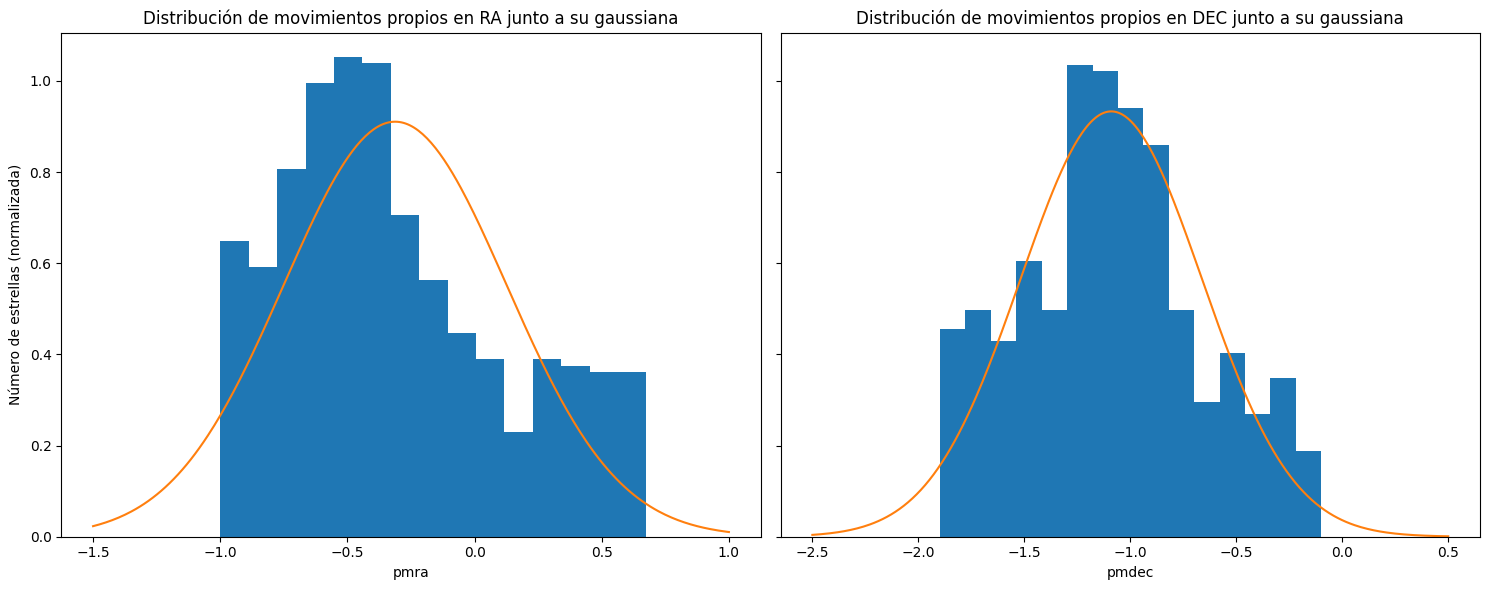

In [110]:
# Se crea un objeto que contenga dos gráficos separados
_, axs = plt.subplots(1, 2, figsize=(15,6), sharey=True, layout='tight')

# Se grafica el histograma con 15 bins y la distribución gaussiana de pmra, y en el otro lo mismo pero con pmdec
axs[0].hist(pmra, 15, density=True)
axs[0].plot(x_pmra, fx_pmra)
axs[1].hist(pmdec, 15, density=True)
axs[1].plot(x_pmdec, fx_pmdec)

# Se añaden los títulos
axs[0].set_xlabel("pmra")
axs[0].set_ylabel("Número de estrellas (normalizada)")
axs[0].set_title("Distribución de movimientos propios en RA junto a su gaussiana")
axs[1].set_xlabel("pmdec")
axs[1].set_title("Distribución de movimientos propios en DEC junto a su gaussiana")

Repita la figura anterior y ahora agréguele a cada gráfica (pmra y pmdec) una franja vertical que abarque $\mu \pm \sigma$ utilizando **plt.axvspan()**

Text(0.5, 1.0, 'Distribución de movimientos propios en DEC junto a su gaussiana')

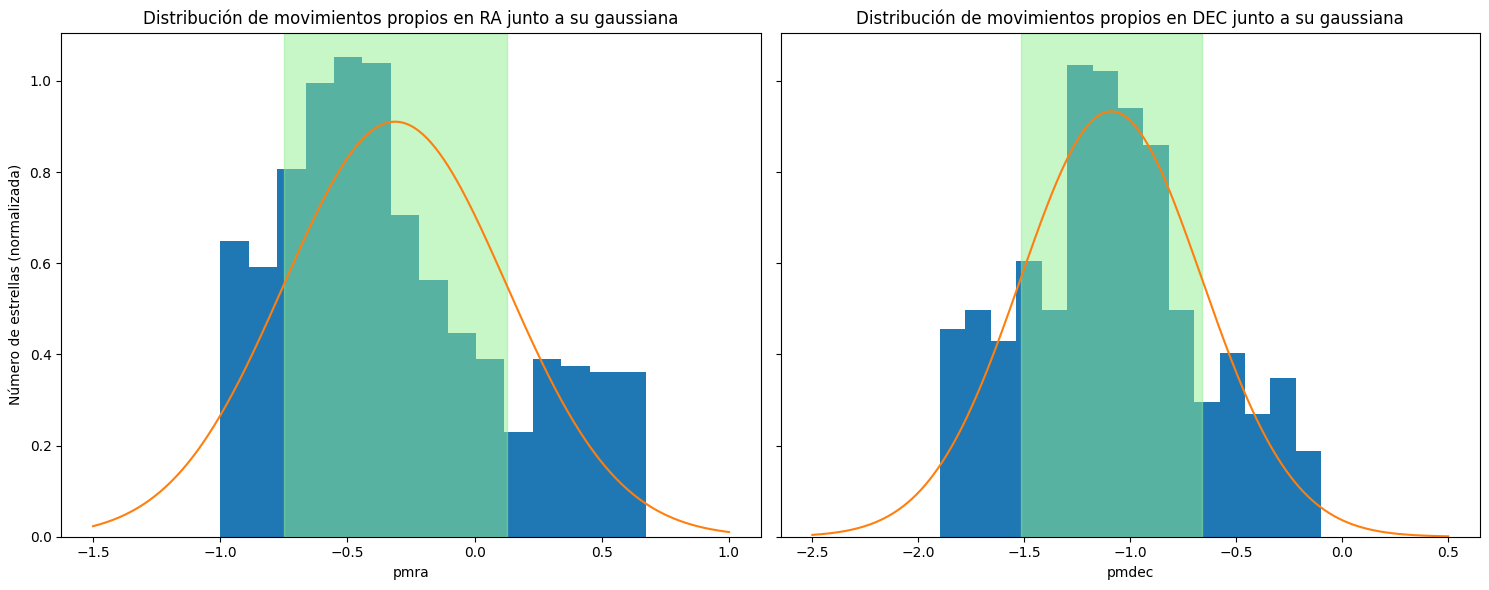

In [111]:
# Se crea el objeto para hacer los dos graficos por separados
_, axs = plt.subplots(1, 2, figsize=(15,6), sharey=True, layout='tight')

# Se grafica el histograma en uno con 15 bins y la distribución gaussiana de pmra, y en el otro lo mismo pero con pmdec
axs[0].hist(pmra, 15, density=True)
axs[0].plot(x_pmra, fx_pmra)

axs[1].hist(pmdec, 15, density=True)
axs[1].plot(x_pmdec, fx_pmdec)

# Se crean las franjas verticales
axs[0].axvspan(mu_pmra - std_pmra, mu_pmra + std_pmra, color='lightgreen', alpha=0.5)
axs[1].axvspan(mu_pmdec - std_pmdec, mu_pmdec + std_pmdec, color='lightgreen', alpha=0.5)

# Se añaden los títulos
axs[0].set_xlabel("pmra")
axs[0].set_ylabel("Número de estrellas (normalizada)")
axs[0].set_title("Distribución de movimientos propios en RA junto a su gaussiana")
axs[1].set_xlabel("pmdec")
axs[1].set_title("Distribución de movimientos propios en DEC junto a su gaussiana")

Según las gaussiaas obtenidas, ¿Cuál es la estimación para pmra y pmdec del cúmulo globular?

**Respuesta:**

Según la distribución gaussiana obtenida, la estimación para pmra y pmdec corresponde (aproximadamente) a su promedio, es decir, -0.3123486977209311 mas/yr y -1.0897362576861138 mas/yr respectivamente. Esta aproximación posee un error que está asociado a la franja vertical remarcada en el gráfico.

# Segunda parte: Señal a Ruido
Para la siguiente parte deberá trabajar con datos de espectros con líneas de emisión. Un espéctro lo puede entender como un gráfico de potencia vs longitud de onda.

Abra el archivo **data_spectra.csv** con pandas y muestre el DataFrame. (No es necesario montar de nuevo el drive porque ya se hizo en la parte anterior).

Las columnas **obs** corresponden a observaciones (espectro) de un objeto, en la que cada valor corresponde a la potencia asociada a una longitud de onda. La columna **Wlth** corresponde a las longitudes de onda.

In [112]:
# Lea y muestre el DataFrame aquí

# Se guarda el path del archivo en mi Drive y luego se lee con read_csv
path = 'drive/MyDrive/Modulo/Tarea2/data_spectra.csv'
data = pd.read_csv(path)
data

,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_18,obs_19,obs_20
0,0,13893.158801,0.673065,1.048759,1.135927,1.365672,1.205216,0.777480,0.777436,0.723454,...,0.851846,0.828067,0.964739,0.894189,0.734513,0.888324,0.764781,1.213573,0.952286,0.714581
1,1,13894.381791,1.218438,1.384774,0.647763,1.286700,1.223776,1.295540,1.289402,0.979057,...,0.792874,0.792945,1.115174,1.228799,0.755613,0.933819,1.020234,1.121144,1.394790,0.795326
2,2,13895.604780,1.244496,0.775893,1.213005,0.898531,1.203176,1.130615,1.133467,0.645016,...,1.221805,1.081824,0.871400,1.229938,0.928502,0.949589,1.276152,0.616311,1.130431,1.004481
3,3,13896.827769,1.395414,0.853016,0.929927,0.617134,1.101129,1.363642,0.810799,0.901758,...,0.847701,1.200020,1.196751,1.047428,0.729014,1.230125,1.368756,0.777179,0.810549,0.716121
4,4,13898.050759,1.013531,0.891468,1.125626,1.354080,0.681703,0.968364,0.630361,1.299735,...,0.612065,0.706618,0.696333,1.021694,1.160951,1.081304,1.387839,0.791448,0.876079,0.704909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1415,15623.688705,0.693123,1.222298,1.249391,1.105946,1.374470,0.780127,1.094418,1.061418,...,1.350584,0.760689,1.397787,0.627549,0.698279,0.815585,0.813801,1.079114,0.652794,0.897564
1416,1416,15624.911694,1.387281,1.332809,1.151107,1.254744,1.331042,0.979532,0.881491,1.209496,...,1.177786,0.711269,1.098026,0.829656,1.314102,1.167825,1.275656,0.947942,0.827006,1.365960
1417,1417,15626.134683,1.208096,0.914692,0.874394,1.083929,1.352754,0.606663,0.657862,1.055156,...,0.656540,0.970074,0.997054,1.222855,0.970080,1.306091,1.173684,0.832711,1.381874,1.149033
1418,1418,15627.357673,1.167845,1.261191,1.306496,0.945764,1.119779,0.892840,1.305614,0.618601,...,0.827102,0.619797,1.307590,0.979190,0.767770,1.170864,0.892064,1.355639,0.753463,1.000630


### a) Gráfico de primer espectro:
Grafique el espectro de la primera observación (columna **obs_1** vs columna **Wlth**) y responda: ¿Cuántas líneas de emisión detecta a simple vista?

**Respuesta:** A simple vista, se pueden observar tres lineas de emisión, siendo una mucho más grande que las otras dos.

Text(0.5, 0, 'Longitud de onda')

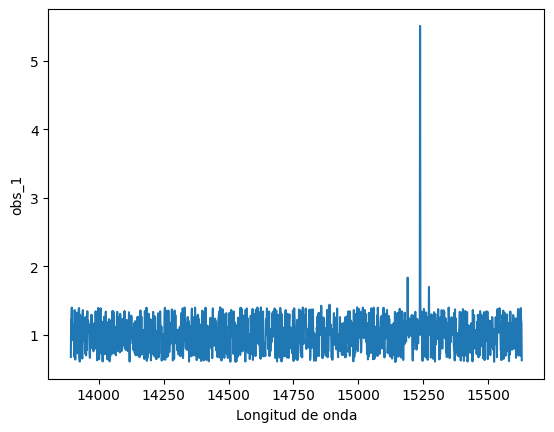

In [113]:
# Grafique aquí

# Se extraen las columnas Wlth y obs_1 del DataFrame
wlth = data['Wlth']
obs_1 = data['obs_1']

# Se crea un gráfico normal de la longitud de onda en el eje x y obs_1 en el eje usando plt
plt.plot(wlth, obs_1)

# Se añaden los titulos a los ejes
plt.ylabel("obs_1")
plt.xlabel("Longitud de onda")

Notará que los valores del eje y están centrados alrededor de 1. Centre la observación en 0. Para esto, estime el valor medio del ruido y réstelo a todo el espectro ¿Cómo piensa que podria hacer esto?. Grafique el espectro resultante.

**Respuesta:** Se puede obtener el promedio del ruido de obs_1, y luego restarselo al array para centrar los datos en cero.

Text(0.5, 0, 'Longitud de onda')

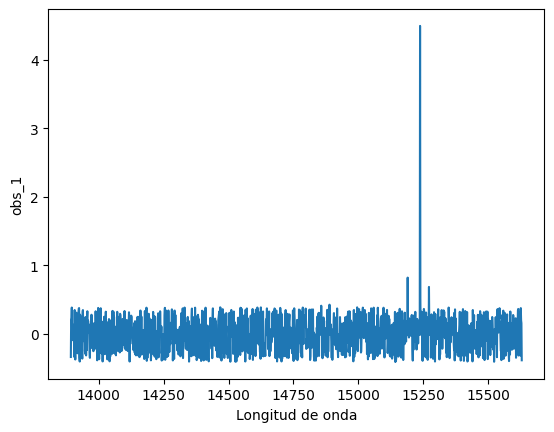

In [114]:
# Grafique el espectro centrado en 0 aquí

# Se calcula su media aritmética
mu_obs1 = obs_1.mean()

# Se le resta la media aritmética a obs_1 para centrar el espectro
obs_1_clean = obs_1 - mu_obs1

# Se realiza el gráfico utilizando obs_1_clean
plt.plot(wlth, obs_1_clean)

# Se añaden los titulos de los ejes
plt.ylabel("obs_1")
plt.xlabel("Longitud de onda")

### b) Nivel de ruido:

En esta parte estimaremos el nivel de ruido de la la observación 1 de una forma distinta. Para esto siga los sigueintes pasos:

1. Tome la columna **obs_1** y guarde en la variable **ruido** un subconjunto de datos centrados en la media de **obs_1** con un margen de $\pm 3 \sigma$, con $\sigma$ la desviación estándar de **obs_1**.

Note que este subconjunto corresponde a ruido principalmente.

In [115]:
# Se calcula la desviación estándar de obs_1
std_obs_1 = obs_1.std()

# Se filtra la Serie obs_1 y se guardan los datos que estén entre mu_obs1 - std_obs_1 y mu_obs1 + std_obs_1
ruido = obs_1.loc[lambda x: (x >= mu_obs1 - std_obs_1) & (x <= mu_obs1 + std_obs_1)]

2. Reste la media del ruido al espectro para centrar y grafique el espectro resultante.

Text(0.5, 0, 'Longitud de onda')

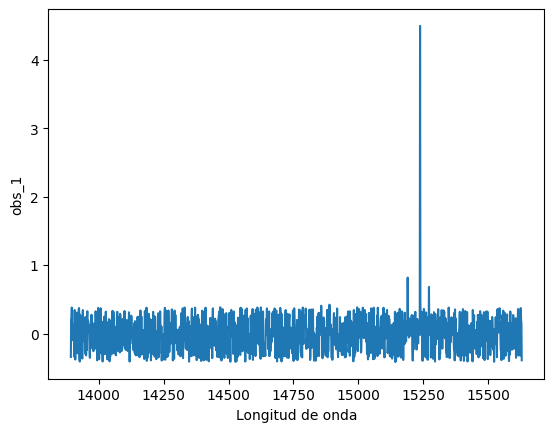

In [116]:
# Grafique el espectro centrado en 0 aquí

# Se obtiene la media aritmética del ruido
mu_ruido = ruido.mean()

# Se le resta la media aritmética del ruido a la columna obs_1
obs_1_clean2 = obs_1 - mu_ruido

# Se grafica el array obtenido usando plt
plt.plot(wlth, obs_1_clean2)

# Se añaden los titulos de eje
plt.ylabel("obs_1")
plt.xlabel("Longitud de onda")

3. Calcule $\sigma$ del ruido y grafique un margen de $\pm n*\sigma$ (con $n$ entero) sobre el espectro como dos líneas horizontales. ¿Qué valor de $n$ le parece adecuado y por qué? este será el nivel de ruido.

**Respuesta:** El valor apropiado para n parece ser 3, pues logra enmarcar todo el ruido.

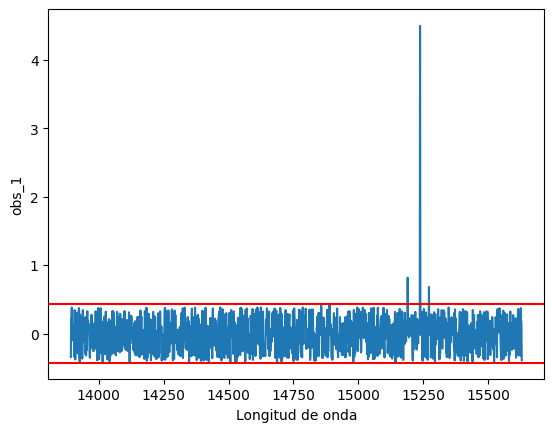

In [117]:
# Se obtiene la desviación estándar del ruido
ruido_std = ruido.std()

# Se fija un n (por medio de prueba y error)
n = 3

# Se grafican los mismos datos que en la celda de código anterior
plt.plot(wlth, obs_1_clean2)

# Se añaden los títulos de los ejes
plt.ylabel("obs_1")
plt.xlabel("Longitud de onda")

# Se grafican las líneas horizontales en n*ruido_std y -n*ruido_std
plt.axhline(y = n*ruido_std, color = 'r', linestyle = '-')
plt.axhline(y = -n*ruido_std, color = 'r', linestyle = '-')

### c) Disminución de $\sigma$

Ahora verá cómo el nivel de ruido disminuye al promediar observaciones. Siga los siguientes pasos:

1. Centre todas las observaciones en 0 de la misma manera hecha en ela parte b). Como consejo, puede recorrer las columnas del DataFrame con un for y modificar solo las que correspondan a una observación.

In [118]:
# Se crea un bucle desde 1 hasta 20
for i in range(1,21):
  # Se crea el nombre de la columna usando el índice actual
  obs_n = "obs_"+str(i)

  # Se extrae la columna deseada
  col = data[obs_n]

  # Se obtiene la desviación estándar y media aritmética de la columna extraída
  col_std = col.std()
  col_mu = col.mean()

  # Se filtra el ruido de aquella columna (datos entre col_mu - col_std y col_mu + col_std)
  ruido = col.loc[lambda x: (x >= col_mu - col_std) & (x <= col_mu + col_std)]

  # Se calcula el promedio del ruido
  ruido_mu = ruido.mean()

  # Se crea un nuevo array que es igual a la columna extraída menos el ruido
  col_clean = col - ruido_mu

  # Se reemplaza la columna actual por la "sanitizada"
  data[obs_n] = col_clean

2. A continuación verá cómo cambia sigma a medida que promediamos los espectros. Para esto realice el siguiente algoritmo:

 - Calcule $\sigma$ de **obs_1**.
 - Promedie **obs_1** y **obs_2**, y calcule $\sigma$.
 - Promedie **obs_1**, **obs_2** y **obs_3**, y calcule $\sigma$.
 - Siga hasta haber promediado todas las observaciones (recuerde guardar los valores de $\sigma$)

 Añada al DataFrame una nueva columna **obs_all** que corresponda al promedio de todos los espectros.

In [119]:
# promediar: int, Series, list -> array, list
# Función recursiva que recibe el numero de columna a procesar, un array con la suma de los datos procesados, y una lista de desviaciones estándar
# Devuelve el array promediado y la lista con desviaciones estándar
def promediar(n_col:int, arr_mu, arr_std):
  # Caso base (ya está todo procesado)
  if n_col == 21:
    # Se devuelve el array que contiene el promedio de todas las observaciones y la lista de las desviaciones estándar
    return (arr_mu/20, arr_std)
  elif n_col == 1:
    # Cuando se empieza a procesar el array, se necesita pasarle a la llamada recursiva una lista con un solo elemento y un array igual a la columna 1
    obs_n = "obs_1"
    col = data[obs_n]
    col_std = col.std()
    # Recursión
    return promediar(n_col+1, col, [col_std])
  else:
    # Se crea el nombre de la columna n_col-ésima
    obs_n = "obs_" + str(n_col)

    # Se extrae la columna deseada
    col = data[obs_n]

    # Se suma el array arr_mu con la columna extraída
    arr_mean = col + arr_mu

    # Se añade la desviación estándar actual a la lista
    arr_std.append((arr_mean/n_col).std())

    # Recursión
    return promediar(n_col+1, arr_mean, arr_std)

# Se llama a la función recursiva para obtener el array promedio de todas las observaciones y la evolución de la desviación estándar
arr_mean, arr_std = promediar(1, pd.Series(), [])

# Se crea una nueva columna obs_all y se guarda el array promedio
data["obs_all"] = arr_mean

 3. Finalmente grafique los valores de $\sigma$ en funcion de $N$, con $N$ el numero de observaciones promediada. ¿Qué ocurre con $\sigma$? ¿Es esperado el resultado? Comente.

**Respuesta:** Se puede observar que la desviacion estandar va disminuyendo exponencialmente a medida que se incrementa el numero de observaciones promediada. El resultado es de esperar, pues los datos cada vez se parecen mas entre si, lo que hace que el promedio sea mas acertado y de esa manera la desviacion estandar disminuye.

Text(0.5, 1.0, 'Desviación estándar vs número de observaciones')

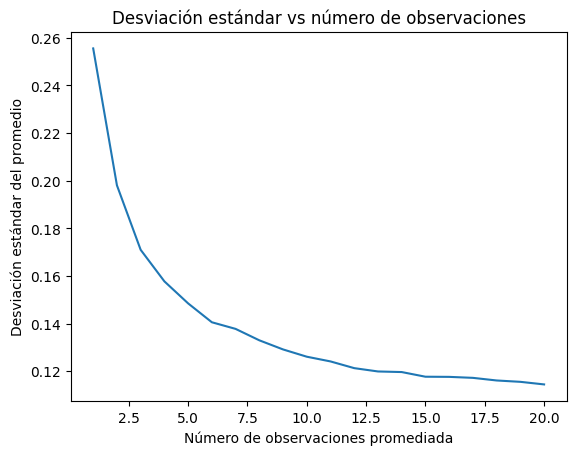

In [120]:
# Se crean los valores de x desde 1 hasta 20
x = range(1,21)

# Se grafica la desviación estándar en función del número de observaciones promediadas
plt.plot(x, arr_std)

# Se añaden los títulos
plt.xlabel("Número de observaciones promediada")
plt.ylabel("Desviación estándar del promedio")
plt.title("Desviación estándar vs número de observaciones")

### d) Promedio de observaciones

Finalmente grafique el promedio de todas las observaciones (columna **obs_all** vs columna **Wlth**). ¿Cuántas líneas de emisión puede apreciar ahora? ¿Podría explicar a qué se debe? Comente.

**Respuesta:** Ahora se pueden apreciar cinco lineas de emision. Esto es posible gracias a la disminución de ruido que se pudo obtener gracias a la promediación de todas las columnas obs.

Text(0, 0.5, 'obs_all (Observaciones promediadas)')

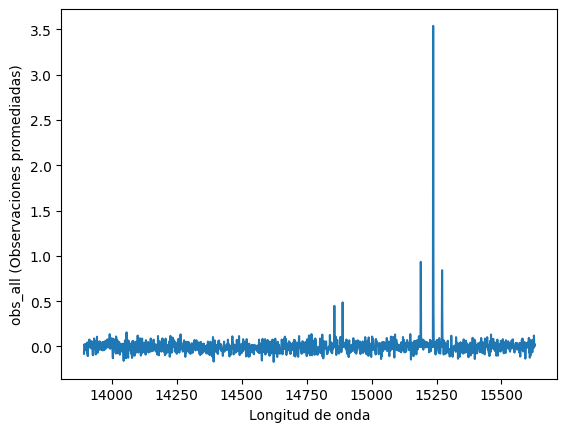

In [121]:
# Se grafica, finalmente, obs_all en función de la longitud de onda.
plt.plot(wlth, data["obs_all"])

# Se añaden los títulos
plt.xlabel("Longitud de onda")
plt.ylabel("obs_all (Observaciones promediadas)")